In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
file_path = 'processed_lung_cancer_data_cleaned.csv'
data = pd.read_csv(file_path)

# One-hot encode categorical features (excluding 'country' and date columns)
data = pd.get_dummies(data, columns=['gender', 'family_history', 'hypertension', 'asthma', 'cirrhosis', 
                                     'other_cancer'], drop_first=True)

# Select the feature columns (excluding 'survived', 'country', and date columns)
X = data.drop(columns=['survived', 'country', 'diagnosis_date', 'beginning_of_treatment_date', 'end_treatment_date'])
y = data['survived']

# Identify numeric columns (you can adjust these based on your dataset)
numeric_cols = ['age', 'bmi', 'cholesterol_level', 'treatment_duration_days']

# Normalizing only the numeric columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Splitting the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying KNN Classifier with k=7
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Predicting on the test set
y_pred = knn.predict(X_test)

# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = [0, 1]
plt.xticks(tick_marks, ['Not Survived', 'Survived'], rotation=45)
plt.yticks(tick_marks, ['Not Survived', 'Survived'])

# Adding the labels
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Adding values inside the confusion matrix boxes
thresh = conf_matrix.max() / 2.
for i, j in zip(*[range(len(conf_matrix))] * 2):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np

# Load the dataset
file_path = 'processed_lung_cancer_data_cleaned.csv'
data = pd.read_csv(file_path)

# One-hot encode categorical features (excluding 'country' and date columns)
data = pd.get_dummies(data, columns=['gender', 'family_history', 'hypertension', 'asthma', 'cirrhosis', 
                                     'other_cancer'], drop_first=True)

# Select the feature columns (excluding 'survived', 'country', and date columns)
X = data.drop(columns=['survived', 'country', 'diagnosis_date', 'beginning_of_treatment_date', 'end_treatment_date'])
y = data['survived']

# Identify numeric columns (you can adjust these based on your dataset)
numeric_cols = ['age', 'bmi', 'cholesterol_level', 'treatment_duration_days']

# Normalizing only the numeric columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Define different pairs of features to test
feature_pairs = [
    ['age', 'bmi'],
    ['cholesterol_level', 'treatment_duration_days'],
    ['age', 'cholesterol_level', 'treatment_duration_days'],
    ['bmi', 'cholesterol_level', 'treatment_duration_days'],
]

# Iterate through feature pairs and evaluate the KNN classifier
for features in feature_pairs:
    print(f"\nTesting features: {features}")
    
    # Selecting the specified features for X
    X_test_pair = X[features + [col for col in X.columns if col not in features]]
    
    # Splitting the dataset into training and test sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X_test_pair, y, test_size=0.2, random_state=42)

    # Applying KNN Classifier with k=7
    knn = KNeighborsClassifier(n_neighbors=7)
    knn.fit(X_train, y_train)

    # Predicting on the test set
    y_pred = knn.predict(X_test)

    # Evaluating the classifier
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f'Accuracy: {accuracy}')
    print(f'Classification Report:\n{classification_rep}')

    # Generating the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plotting the confusion matrix using Matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = [0, 1]
    plt.xticks(tick_marks, ['Not Survived', 'Survived'], rotation=45)
    plt.yticks(tick_marks, ['Not Survived', 'Survived'])

    # Adding the labels
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    # Adding values inside the confusion matrix boxes
    thresh = conf_matrix.max() / 2.
    for i, j in zip(*[range(len(conf_matrix))] * 2):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
file_path = 'v150000_lung_cancer_mortality_data_v2.csv'
data = pd.read_csv(file_path)

# Preprocessing: Encode categorical features and normalize numeric features
le_cholesterol_level = LabelEncoder()
le_treatment_type = LabelEncoder()
le_gender = LabelEncoder()

# Encode categorical columns
data['cholesterol_level'] = le_cholesterol_level.fit_transform(data['cholesterol_level'])
data['treatment_type'] = le_treatment_type.fit_transform(data['treatment_type'])
data['gender'] = le_gender.fit_transform(data['gender'])

# Selecting features and target variable
X = data[['cholesterol_level', 'treatment_type', 'gender']]
y = data['survived']

# Normalizing numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Applying KNN Classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predicting on the test set
y_pred = knn.predict(X_test)

# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = [0, 1]
plt.xticks(tick_marks, ['Not Survived', 'Survived'], rotation=45)
plt.yticks(tick_marks, ['Not Survived', 'Survived'])

# Adding the labels
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Adding values inside the confusion matrix boxes
thresh = conf_matrix.max() / 2.
for i, j in zip(*[range(len(conf_matrix))] * 2):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
file_path = 'v150000_lung_cancer_mortality_data_v2.csv'
data = pd.read_csv(file_path)

# Preprocessing: Encode categorical features and normalize numeric features
le_cholesterol_level = LabelEncoder()
le_smoking_status = LabelEncoder()
le_treatment_type = LabelEncoder()
le_gender = LabelEncoder()  # Encoding gender as well, for example

# Encode categorical columns
data['cholesterol_level'] = le_cholesterol_level.fit_transform(data['cholesterol_level'])
data['smoking_status'] = le_smoking_status.fit_transform(data['smoking_status'])
data['treatment_type'] = le_treatment_type.fit_transform(data['treatment_type'])
data['gender'] = le_gender.fit_transform(data['gender'])  # Encoding gender

# Adding more features: age, gender, etc. (replace with real column names in your dataset)
X = data[['cholesterol_level', 'smoking_status', 'treatment_type', 'age', 'gender']]  
y = data['survived']

# Normalizing numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Applying XGBoost Classifier
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb.fit(X_train, y_train)

# Predicting on the test set
y_pred = xgb.predict(X_test)

# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = [0, 1]
plt.xticks(tick_marks, ['Not Survived', 'Survived'], rotation=45)
plt.yticks(tick_marks, ['Not Survived', 'Survived'])

# Adding the labels
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Adding values inside the confusion matrix boxes
thresh = conf_matrix.max() / 2.
for i, j in zip(*[range(len(conf_matrix))] * 2):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()



Testing KNN with One-vs-Rest strategy
Accuracy: 0.5102
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      4885
           1       0.52      0.52      0.52      5115

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.51      0.51      0.51     10000

Confusion Matrix:
[[2449 2436]
 [2462 2653]]


ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (2).

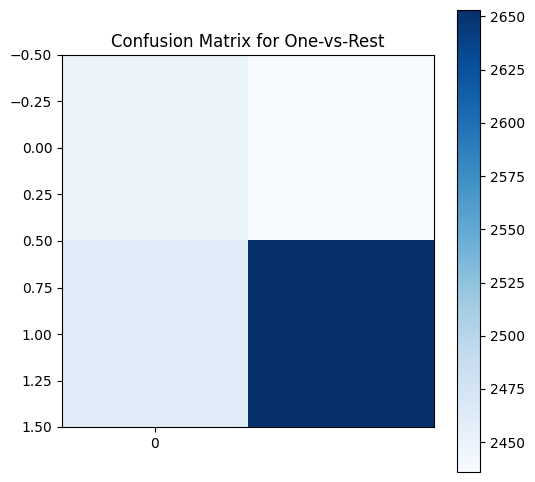

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier, OutputCodeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize
from itertools import cycle
import numpy as np

# Load the dataset
file_path = 'processed_lung_cancer_data_cleaned.csv'
data = pd.read_csv(file_path)

# Encode categorical columns
categorical_cols = ['gender', 'family_history', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer']
for col in categorical_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

# Select features and target
X = data[['age', 'bmi']]
y = data['survived']

# Binarize the output for ROC curve plotting
y_binarized = label_binarize(y, classes=[0, 1])
n_classes = y_binarized.shape[1]

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the KNN classifier
knn = KNeighborsClassifier(n_neighbors=7)

# Define the multi-class strategies to test
strategies = {
    "One-vs-Rest": OneVsRestClassifier(knn),
    "One-vs-One": OneVsOneClassifier(knn),
    "ECOC": OutputCodeClassifier(knn, code_size=2, random_state=42)
}

# Test each strategy and print the results
for strategy_name, strategy_clf in strategies.items():
    print(f"\nTesting KNN with {strategy_name} strategy")
    
    # Fit the classifier with the chosen strategy
    strategy_clf.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = strategy_clf.predict(X_test)
    
    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    # Print detailed classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {strategy_name}')
    plt.colorbar()
    tick_marks = [0, 1]
    plt.xticks(tick_marks, ['Not Survived', 'Survived'], rotation=45)
    plt.yticks(tick_marks, ['Not Survived', 'Survived'])
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    # Add values inside the confusion matrix
    thresh = conf_matrix.max() / 2.
    for i, j in np.ndindex(conf_matrix.shape):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")
    plt.tight_layout()
    plt.show()

    # ROC Curve for each class
    if strategy_name == "One-vs-Rest":  # Only applicable for OvR where probabilities are available
        y_score = strategy_clf.predict_proba(X_test)

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_binarized[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot all ROC curves
        plt.figure()
        colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=2,
                     label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic for {strategy_name}')
        plt.legend(loc="lower right")
        plt.show()


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier, OutputCodeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
file_path = 'processed_lung_cancer_data_cleaned.csv'
data = pd.read_csv(file_path)

# Encode categorical columns
categorical_cols = ['gender', 'family_history', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer']
for col in categorical_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

# Select features and target
X = data[['age', 'bmi']]
y = data['survived']

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the KNN classifier
knn = KNeighborsClassifier(n_neighbors=7)

# Define the multi-class strategies to test
strategies = {
    "One-vs-Rest": OneVsRestClassifier(knn),
    "One-vs-One": OneVsOneClassifier(knn),
    "ECOC": OutputCodeClassifier(knn, code_size=2, random_state=42)
}

# Test each strategy and print the results
for strategy_name, strategy_clf in strategies.items():
    print(f"\nTesting KNN with {strategy_name} strategy")
    
    # Fit the classifier with the chosen strategy
    strategy_clf.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = strategy_clf.predict(X_test)
    
    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    # Print detailed classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))



Testing KNN with One-vs-Rest strategy
Accuracy: 0.5102
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      4885
           1       0.52      0.52      0.52      5115

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.51      0.51      0.51     10000


Testing KNN with One-vs-One strategy
Accuracy: 0.5102
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      4885
           1       0.52      0.52      0.52      5115

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.51      0.51      0.51     10000


Testing KNN with ECOC strategy
Accuracy: 0.5102
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      4885
        

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder
from itertools import combinations

# Load the dataset
file_path = 'processed_lung_cancer_data_cleaned.csv'
data = pd.read_csv(file_path)

# Label encode categorical columns that need to be handled as multi-class labels
label_encoders = {}
categorical_cols = ['gender', 'family_history', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer']

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Select the feature columns (excluding 'survived', 'country', and date columns)
X = data.drop(columns=['survived', 'country', 'diagnosis_date', 'beginning_of_treatment_date', 'end_treatment_date'])
y = data['survived']

# Identify numeric columns (you can adjust these based on your dataset)
numeric_cols = ['age', 'bmi', 'cholesterol_level', 'treatment_duration_days']

# Normalizing only the numeric columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Generate all combinations of feature pairs
feature_names = X.columns.tolist()
all_pairs = []
for i in range(1, len(feature_names)+1):
    all_pairs.extend(combinations(feature_names, i))

# Iterate through feature pairs and evaluate the KNN classifier with One-vs-Rest strategy
for features in all_pairs:
    print(f"\nTesting features: {features}")
    
    # Selecting the specified features for X
    X_test_pair = X[list(features)]
    
    # Splitting the dataset into training and test sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X_test_pair, y, test_size=0.2, random_state=42)

    # Using OneVsRestClassifier with KNN
    knn = KNeighborsClassifier(n_neighbors=7)
    ovr = OneVsRestClassifier(knn)
    ovr.fit(X_train, y_train)

    # Predicting on the test set
    y_pred = ovr.predict(X_test)

    # Evaluating the classifier
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f'Accuracy: {accuracy}')
    print(f'Classification Report:\n{classification_rep}')

    # Generating the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plotting the confusion matrix using Matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = [0, 1]
    plt.xticks(tick_marks, ['Not Survived', 'Survived'], rotation=45)
    plt.yticks(tick_marks, ['Not Survived', 'Survived'])

    # Adding the labels
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    # Adding values inside the confusion matrix boxes
    thresh = conf_matrix.max() / 2.
    for i, j in zip(*[range(len(conf_matrix))] * 2):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
file_path = 'processed_lung_cancer_data_cleaned.csv'
data = pd.read_csv(file_path)

# Encode categorical columns
categorical_cols = ['gender', 'family_history', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer']
for col in categorical_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

# Select all features and target variable
X = data.drop(columns=['survived', 'country', 'diagnosis_date', 'beginning_of_treatment_date', 'end_treatment_date'])
y = data['survived']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the KNN model with optimal hyperparameters (you can modify these based on previous tuning)
knn = KNeighborsClassifier(n_neighbors=7, weights='uniform', metric='euclidean')

# Define Stratified K-Fold Cross-Validation
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(knn, X_scaled, y, cv=strat_kfold, scoring='accuracy', n_jobs=-1)

# Print cross-validation results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

# Fit and evaluate the model on the entire dataset for a final report
knn.fit(X_scaled, y)
y_pred = knn.predict(X_scaled)
accuracy = accuracy_score(y, y_pred)
classification_rep = classification_report(y, y_pred)

print(f'\nFinal Model Accuracy on Full Data: {accuracy}')
print(f'Classification Report on Full Data:\n{classification_rep}')
